## MOwNiT - laboratorium 8
### Całkowanie
https://github.com/kzajac/Mownit2018/blob/master/Mownit_lab8.ipynb

In [5]:
using Polynomials
using Plots
using Roots
using QuadGK

<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury_v2.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [6]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp, a) = gauss(Float64, 5)

([-0.90618, -0.538469, 0.0, 0.538469, 0.90618], [0.236927, 0.478629, 0.568889, 0.478629, 0.236927])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [7]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666667

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [8]:
function legendre(n)
    p0 = Poly([1.])
    p1 = Poly([0., 1.])  
    if n == 0
        return p0
    end
    for k = 1:(n - 1)
        p = Poly([0., (2 * k + 1.)]) * p1
        p2 = (p - (k * p0)) / (k + 1.)
        p0 = p1
        p1 = p2
    end
    return p1
end

legendre (generic function with 1 method)

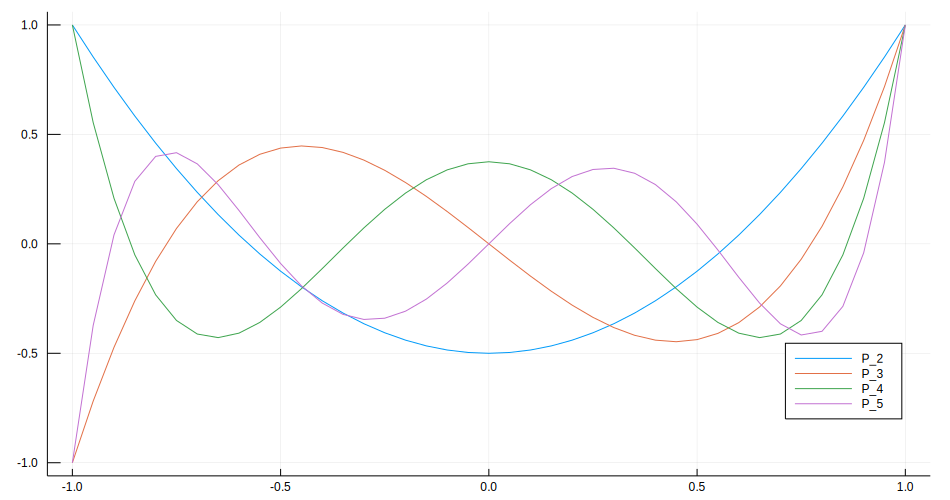

In [9]:
x = -1.:0.05:1.
for i = 2:5
    y = legendre(i)(x)
    p = plot!(x, y, label = "P_$i")
end
plot!(size = (950, 500), legend = :bottomright)

In [22]:
for i = 2:7
    println("degree: ", i)
    r = find_zeros(legendre(i), -1., 1.)
    println("\troots: ", r)
    (xp, a) = gauss(Float64, i)
    println("\tgauss: ", xp)
end

degree: 2
	roots: [-0.57735, 0.57735]
	gauss: [-0.57735, 0.57735]
degree: 3
	roots: [-0.774597, 0.0, 0.774597]
	gauss: [-0.774597, 0.0, 0.774597]
degree: 4
	roots: [-0.861136, -0.339981, 0.339981, 0.861136]
	gauss: [-0.861136, -0.339981, 0.339981, 0.861136]
degree: 5
	roots: [-0.90618, -0.538469, 0.0, 0.538469, 0.90618]
	gauss: [-0.90618, -0.538469, 0.0, 0.538469, 0.90618]
degree: 6
	roots: [-0.93247, -0.661209, -0.238619, 0.238619, 0.661209, 0.93247]
	gauss: [-0.93247, -0.661209, -0.238619, 0.238619, 0.661209, 0.93247]
degree: 7
	roots: [-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108]
	gauss: [-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108]


# Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [23]:
function integrate(f, k)
    (xp, w) = gauss(Float64, k)
    sum(w .* f.(xp))  
end

integrate (generic function with 2 methods)

In [24]:
eps = 1.0e-9

for qdeg = 1:5     
    exact = true
    pdeg = 0
    p = Poly([rand()])
    
    while exact   
        p *= Poly([rand(), rand()])
        pdeg += 1
        
        res = polyint(p, -1, 1)
        qres = integrate(p, qdeg)
        diff = abs(qres - res)
        
        print("qdeg = ", qdeg, ", pdeg = ", pdeg)
        println(" | res = ", res, ", qres = ", qres, ", diff = ", diff)
        
        if diff > eps
            exact = false
        end
    end
    
    println("qdeg = ", qdeg, " ==> exact up to ", pdeg - 1, "-degree poly\n")
end

qdeg = 1, pdeg = 1 | res = 0.28561717715784396, qres = 0.28561717715784396, diff = 0.0
qdeg = 1, pdeg = 2 | res = 0.26011444334423095, qres = 0.21858897124963622, diff = 0.04152547209459473
qdeg = 1 ==> exact up to 1-degree poly

qdeg = 2, pdeg = 1 | res = 0.2494258169909473, qres = 0.24942581699094724, diff = 5.551115123125783e-17
qdeg = 2, pdeg = 2 | res = 0.2754706076606439, qres = 0.27547060766064385, diff = 5.551115123125783e-17
qdeg = 2, pdeg = 3 | res = 0.33168136782224367, qres = 0.3316813678222438, diff = 1.1102230246251565e-16
qdeg = 2, pdeg = 4 | res = 0.3141003769215303, qres = 0.29661104545133316, diff = 0.017489331470197156
qdeg = 2 ==> exact up to 3-degree poly

qdeg = 3, pdeg = 1 | res = 0.07830154011623608, qres = 0.07830154011623605, diff = 2.7755575615628914e-17
qdeg = 3, pdeg = 2 | res = 0.228242538634448, qres = 0.228242538634448, diff = 0.0
qdeg = 3, pdeg = 3 | res = 0.09099860210798442, qres = 0.09099860210798444, diff = 1.3877787807814457e-17
qdeg = 3, pdeg = 4 

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [25]:
function integrate(f, k, a, b)
    fn = x -> f((b + a)/2 + (b - a) / 2 * x)
    return (b - a)/2 * integrate(fn, k)
end

integrate (generic function with 2 methods)

In [26]:
p1 = Poly([1.0, 2.0, 3.0]) # 3x^2 + 2x + 1 == x^3 + x^2 + x
println("polyint:   ", polyint(p1, -0.4, 3))
println("integrate: ", integrate(p1, 4, -0.4, 3))

polyint:   39.304
integrate: 39.30400000000001


In [29]:
println("polyint:   ", exp(13) - exp(-1.1))
println("integrate: ", integrate(exp, 5, -1.1, 3.3))

polyint:   442413.0591378368
integrate: 26.77975216952316


### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [16]:
p1 = Poly([1., 2., 3.]) # 3x^2 + 2x + 1 => x^3 + x^2 + x
println("polyint: ", polyint(p1, -5, 7))
println("quadgk: ", quadgk(p1, -5, 7))

polyint: 504.0
quadgk: (504.0, 1.1368683772161603e-13)


quadqk for gaussian: (1.0000000000032583, 1.4395584941504537e-8)


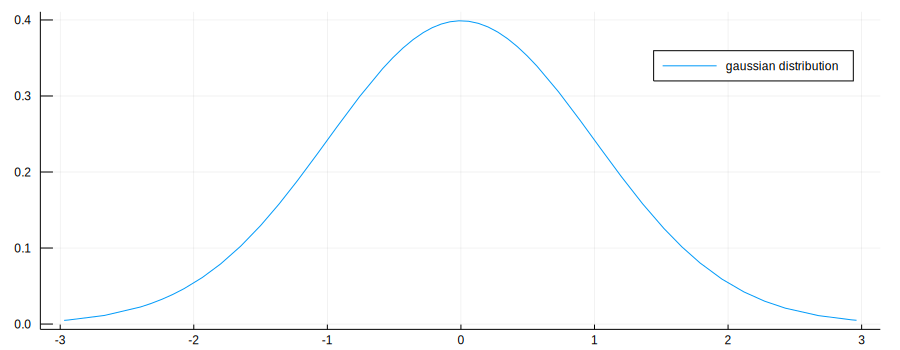

In [31]:
gaussian = x -> (1 / (sqrt(2 * pi))) * exp(-(x * x) / 2)
println("quadqk for gaussian: ", quadgk(gaussian, -Inf, Inf))
plot(gaussian, -3, 3, label = "gaussian distribution", size = (900, 350))

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

In [18]:
function trapezoid(f, a, b, n)
    sum = 0
    dx = (b - a) / n
    xs = range(a, stop = b, length = n + 1)
    for i = 1:n
        sum = sum + (f(xs[i]) + f(xs[i+1])) * dx / 2
    end
    sum
end

trapezoid (generic function with 1 method)

Poly(3.2 + 0.5*x - 1.35*x^2 - 0.55*x^3 + 0.15000000000000002*x^4 + 0.05*x^5)


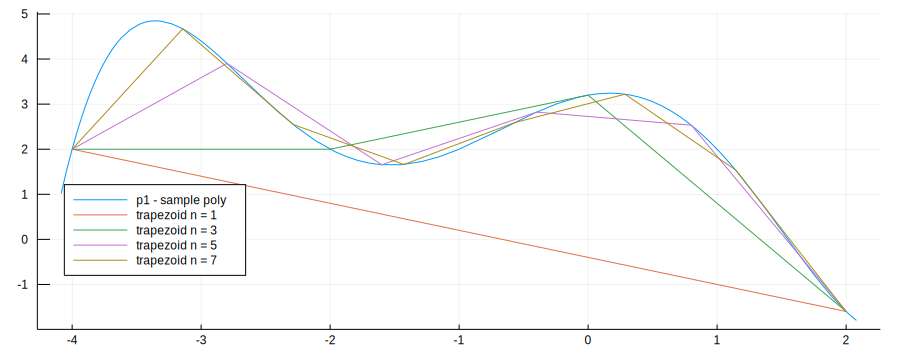

In [19]:
p1 = (1/20) * Poly([64., 10., -27., -11., 3., 1.])
println(p1)
a = -4
b = 2
plot(x -> p1(x), a-0.1, b+0.1, label = "p1 - sample poly")

for n = 1:2:7
    xs = range(a, stop = b, length = n + 1)
    p = plot!(xs, p1(xs), label = "trapezoid n = $n")
end
plot!(size = (900, 350), legend = :bottomleft)

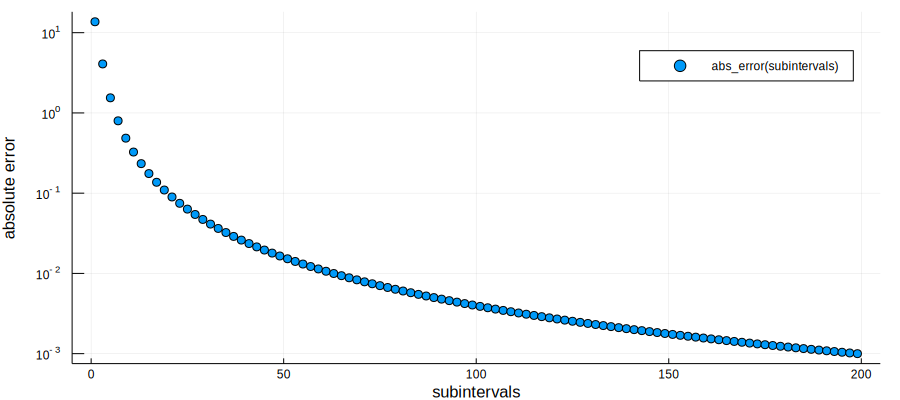

In [20]:
exact = polyint(p1, a, b)
ns = 1:2:200
err = [abs(exact - trapezoid(p1, a, b, n)) for n in ns]
scatter(
    ns,
    err,
    xlabel = "subintervals",
    ylabel = "absolute error",
    label = "abs_error(subintervals)",
    yscale = :log10,
    size = (900, 400)
)